# Technical Analysis of stocks.

## Definition

Technical analysis is a trading discipline used to evaluate investments and identify trading opportunities by analyzing statistical trends from trading activities, such as price movements and volume. Unlike fundamental analysts, who try to assess a security's intrinsic value, technical analysts focus on patterns of price movements, trading signals, and various other analytical charting tools to evaluate a security's strength or weakness.


(source : https://www.investopedia.com/terms/t/technicalanalysis.asp)


## Technical Indicators

- Relative StochStrength Indicator (RSI)
- Stochastic (STOCH)mac
- Moving Average Convergence Divergence (MACD)
- Average WiDirectional Movement (ADX)
- Williams %R (WillR)
- Commodity Channel Index (CCI)
- Averagehig True Range (ATR)
- Ultimate Oscillator (ULTOSC)roc
- Rate of Change (ROC)

### Instal Library Talib

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import talib

In [4]:
plt.rcParams['figure.figsize'] = [16, 12]

## Study Case, analisa saham BCA (BBCA.JK)

### Overview data

In [5]:
tickers = "BBCA.JK"
df = yf.download(tickers, start="2023-01-01", end="2024-01-01",interval="1d")
df.columns = df.columns.droplevel(level='Ticker')

df = df.reset_index()
df = df.drop(df.index[0])
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
1,2023-01-03,8114.258789,8550.0,8600.0,8525.0,8550.0,27399100
2,2023-01-04,7924.451660,8350.0,8575.0,8350.0,8525.0,90918800
3,2023-01-05,7829.547363,8250.0,8375.0,8150.0,8350.0,128838500
4,2023-01-06,7876.999512,8300.0,8325.0,8100.0,8100.0,69286600
5,2023-01-09,8019.355469,8450.0,8450.0,8325.0,8325.0,86916900


In [6]:
# change datatype to date
df['DateTime'] = pd.to_datetime(df['Date'])

# select from first day in this year
df = df[df['DateTime'] >= datetime(2023, 1, 1)]
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,DateTime
1,2023-01-03,8114.258789,8550.0,8600.0,8525.0,8550.0,27399100,2023-01-03
2,2023-01-04,7924.451660,8350.0,8575.0,8350.0,8525.0,90918800,2023-01-04
3,2023-01-05,7829.547363,8250.0,8375.0,8150.0,8350.0,128838500,2023-01-05
4,2023-01-06,7876.999512,8300.0,8325.0,8100.0,8100.0,69286600,2023-01-06
5,2023-01-09,8019.355469,8450.0,8450.0,8325.0,8325.0,86916900,2023-01-09


In [7]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'DateTime'],
      dtype='object', name='Price')

## Plot Harga Saham

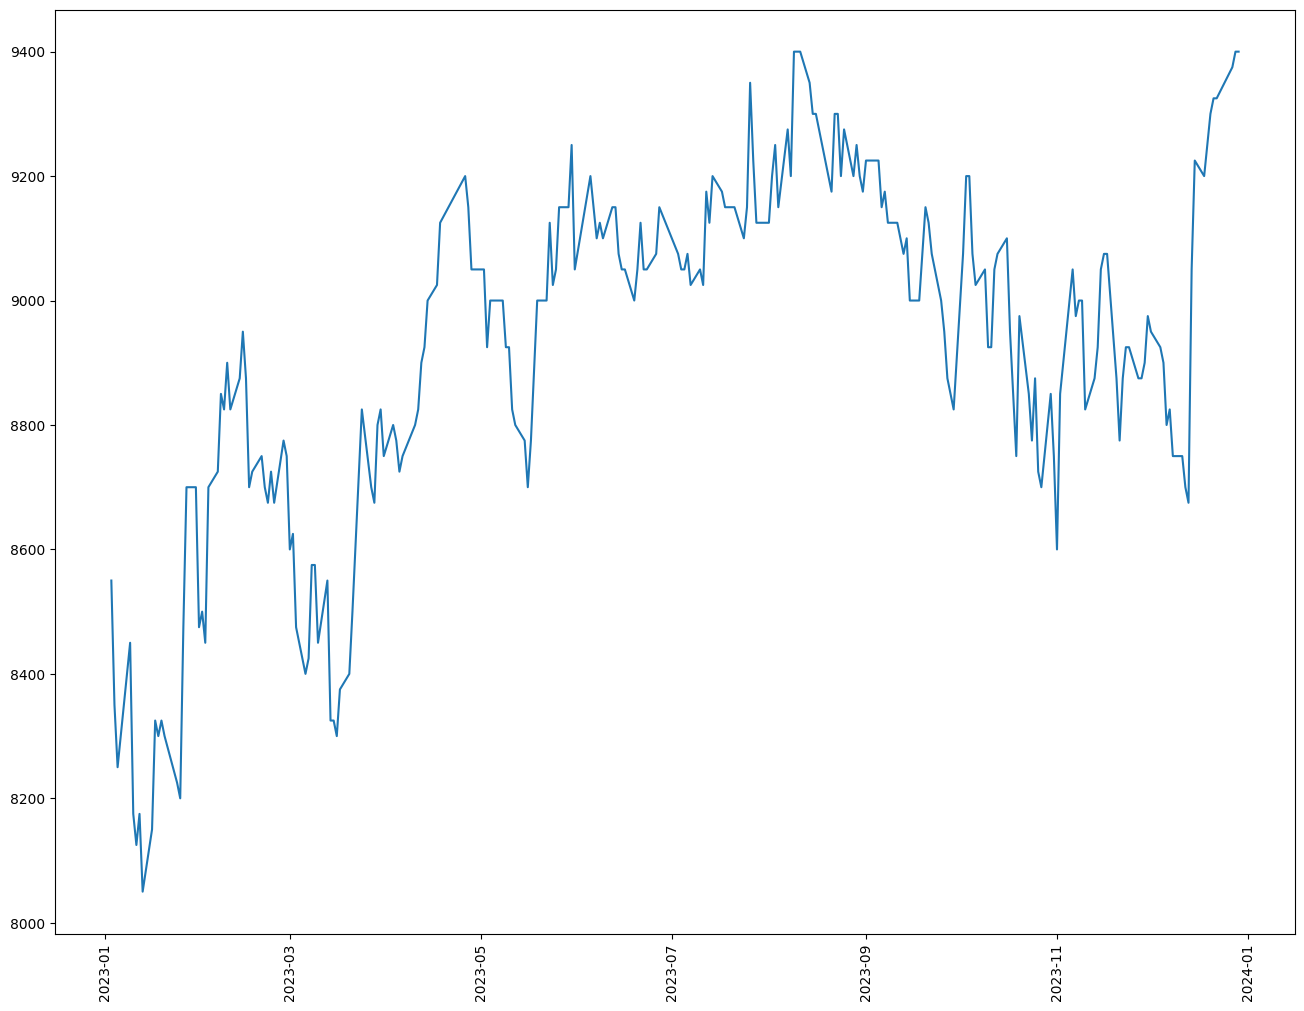

In [8]:
plt.xticks(rotation=90)
plt.plot(df['DateTime'], df['Close'])
plt.show()

## Simple Moving Average

A simple moving average (SMA) is calculated by summing recent closing prices and dividing by the number of time periods. This arithmetic average is derived by adding the closing prices of a security over a set number of periods and then dividing by that same number. Short-term SMA quickly reflect changes in the underlying price, whereas long-term SMA react more slowly.


### Key Takeaway

- The SMA is a technical indicator used to determine whether an asset's price will continue or reverse a bullish or bearish trend.

- The SMA is calculated as the arithmetic average of an asset's price over a specific period.

- The SMA can be enhanced to an Exponential Moving Average (EMA), which gives more weight to recent price actions.

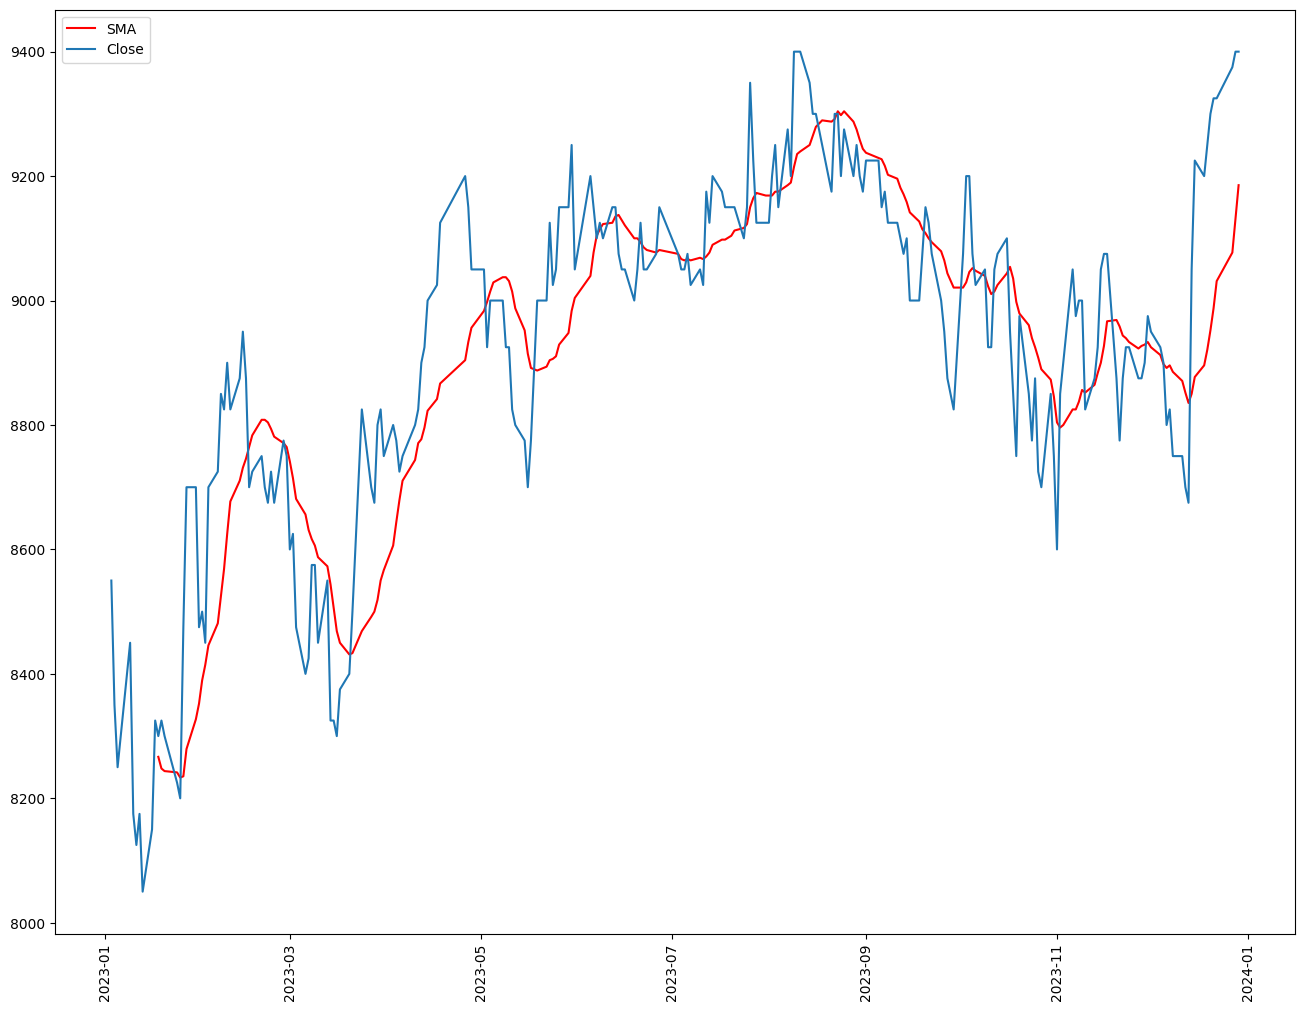

In [9]:
import talib
# calculate moving average
ma = talib.SMA(df['Close'], timeperiod=12)

# rotate x labels
plt.xticks(rotation=90)

# plot for moving average
plt.plot(df['DateTime'], ma, label='SMA', color='r')

# plot for closing price
plt.plot(df['DateTime'], df['Close'], label='Close')

plt.legend(loc='upper left')
plt.show()

##  Relative Strength Index (RSI)

The relative strength index (RSI) is a momentum indicator used to assess the extent of recent price changes to determine if a stock or other asset is overbought or oversold. Displayed as an oscillator, the RSI ranges from 0 to 100. This indicator was created by J. Welles Wilder Jr. and first introduced in his influential 1978 book, New Concepts in Technical Trading Systems.


### Key Takeaway
- Developed in 1978, the RSI is a widely-used momentum oscillator.

- The RSI measures bullish and bearish price momentum, which is plotted against an asset's price chart.

- When the RSI indicator is above 70%, it signals overbought conditions, and when it is below 30%, it indicates oversold conditions.

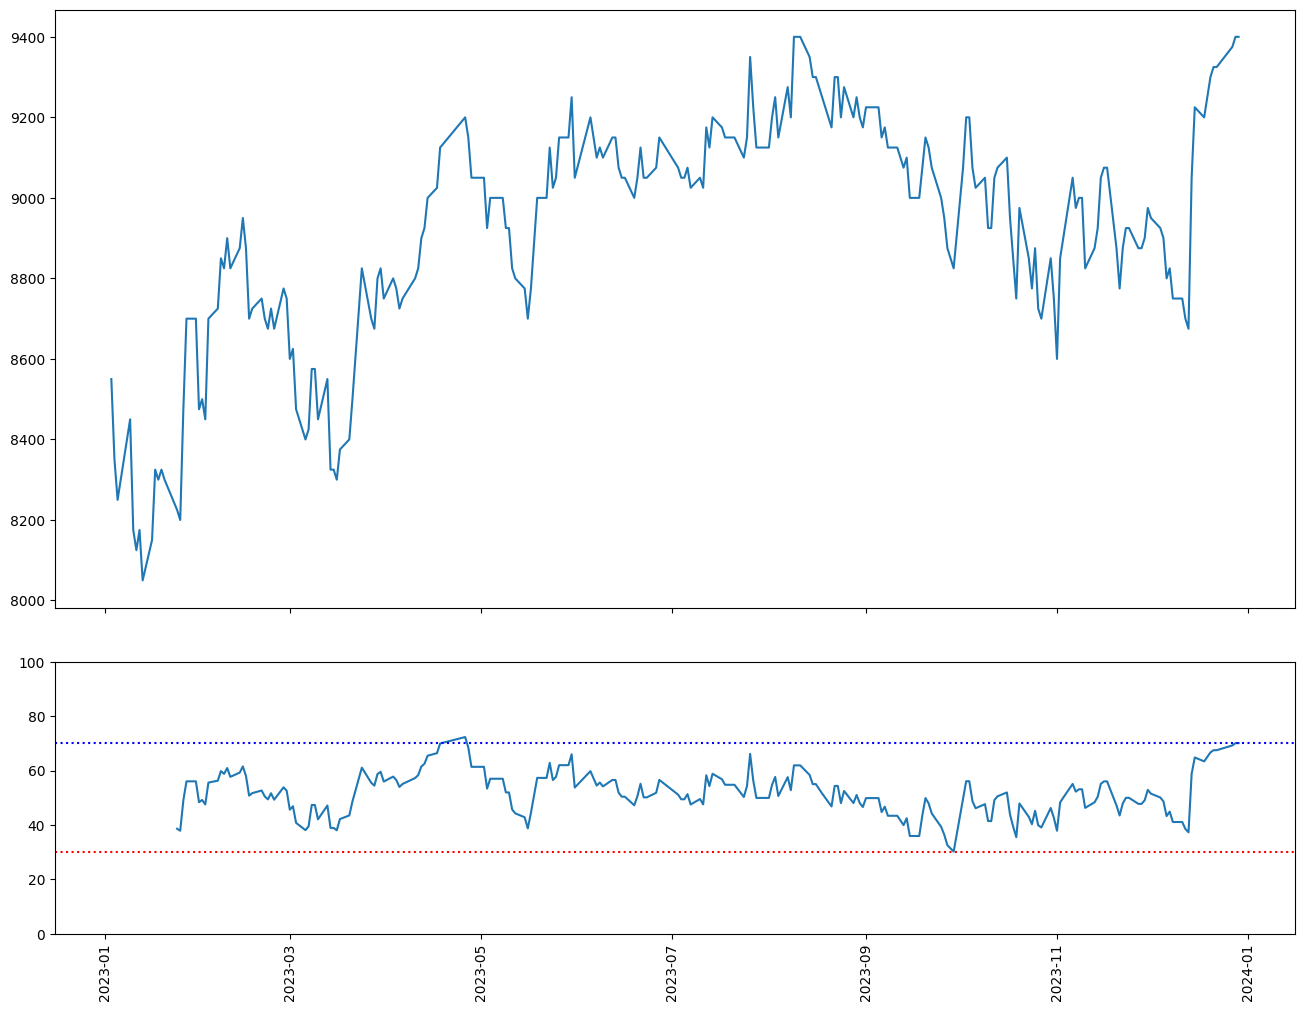

In [10]:
# calculate rsi
output = talib.RSI(df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot rsi
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], output)
ax1.set_ylim(0, 100)
ax1.axhline(y=70, color='b', linestyle='dotted')
ax1.axhline(y=30, color='r', linestyle='dotted')

plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

## Stoch

A stochastic oscillator is a momentum indicator that compares a security's closing price to its price range over a specific period. The sensitivity to market movements can be adjusted by changing the time period or using a moving average. This indicator generates overbought and oversold signals within a 0-100 range.


### Key Takeaway

- The stochastic oscillator is a widely-used technical indicator for identifying overbought and oversold conditions.

- Created in the 1950s, it remains popular today.

- Stochastic oscillators focus on momentum rather than the absolute price.



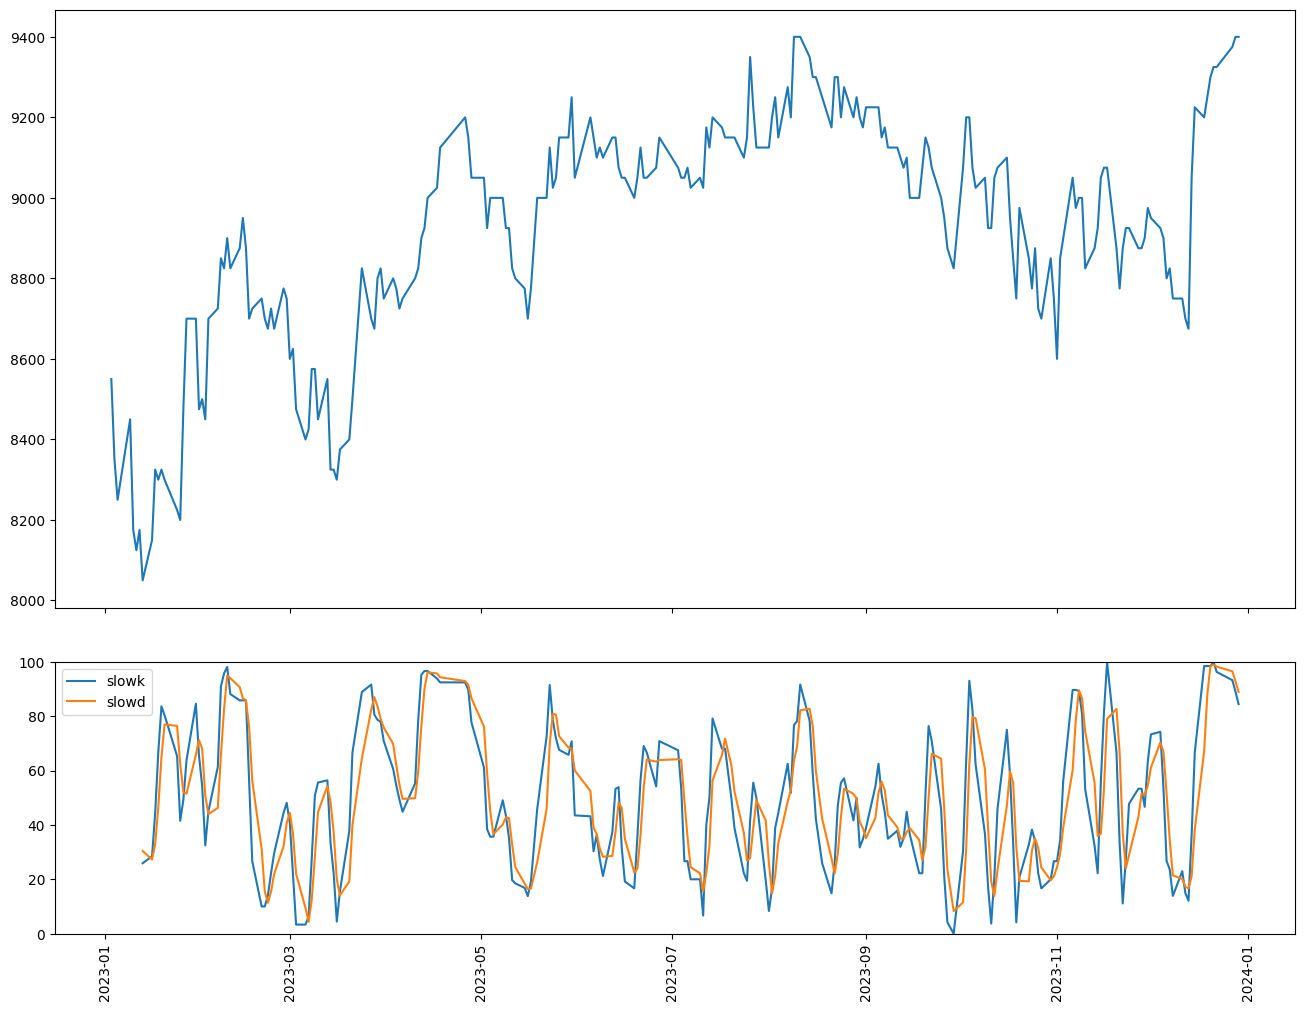

In [11]:
# calculate stoch
slowk, slowd = talib.STOCH(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# Plot Stoch
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.set_ylim(0, 100) # scale y axis to 0 - 100
ax1.plot(df['Date'], slowk, label='slowk')
ax1.plot(df['Date'], slowd, label='slowd')
ax1.legend(loc='upper left')

plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

## StochRSI

The Stochastic RSI (StochRSI) is a technical analysis indicator that ranges from zero to one (or zero to 100 on some platforms). It is derived by applying the Stochastic oscillator formula to relative strength index (RSI) values instead of standard price data. This approach helps traders determine if the current RSI value indicates overbought or oversold conditions. The StochRSI was developed to combine the strengths of both momentum indicators, resulting in a more sensitive tool that reflects a specific security's historical performance rather than a general price change analysis.

### Key Takeaway

- A StochRSI value above 0.8 indicates overbought conditions, while a value below 0.2 signals oversold conditions. On a scale of zero to 100, values above 80 are overbought, and below 20 are oversold.

- Overbought conditions don't necessarily mean the price will drop, just as oversold conditions don't guarantee a price increase. These conditions simply indicate that the RSI is at the extremes of its recent range.

- A reading of zero signifies the RSI is at its lowest point in 14 periods (or the chosen lookback period). A reading of 1 (or 100) indicates the RSI is at its highest point in the last 14 periods. Other StochRSI values show the RSI's position relative to its high or low.

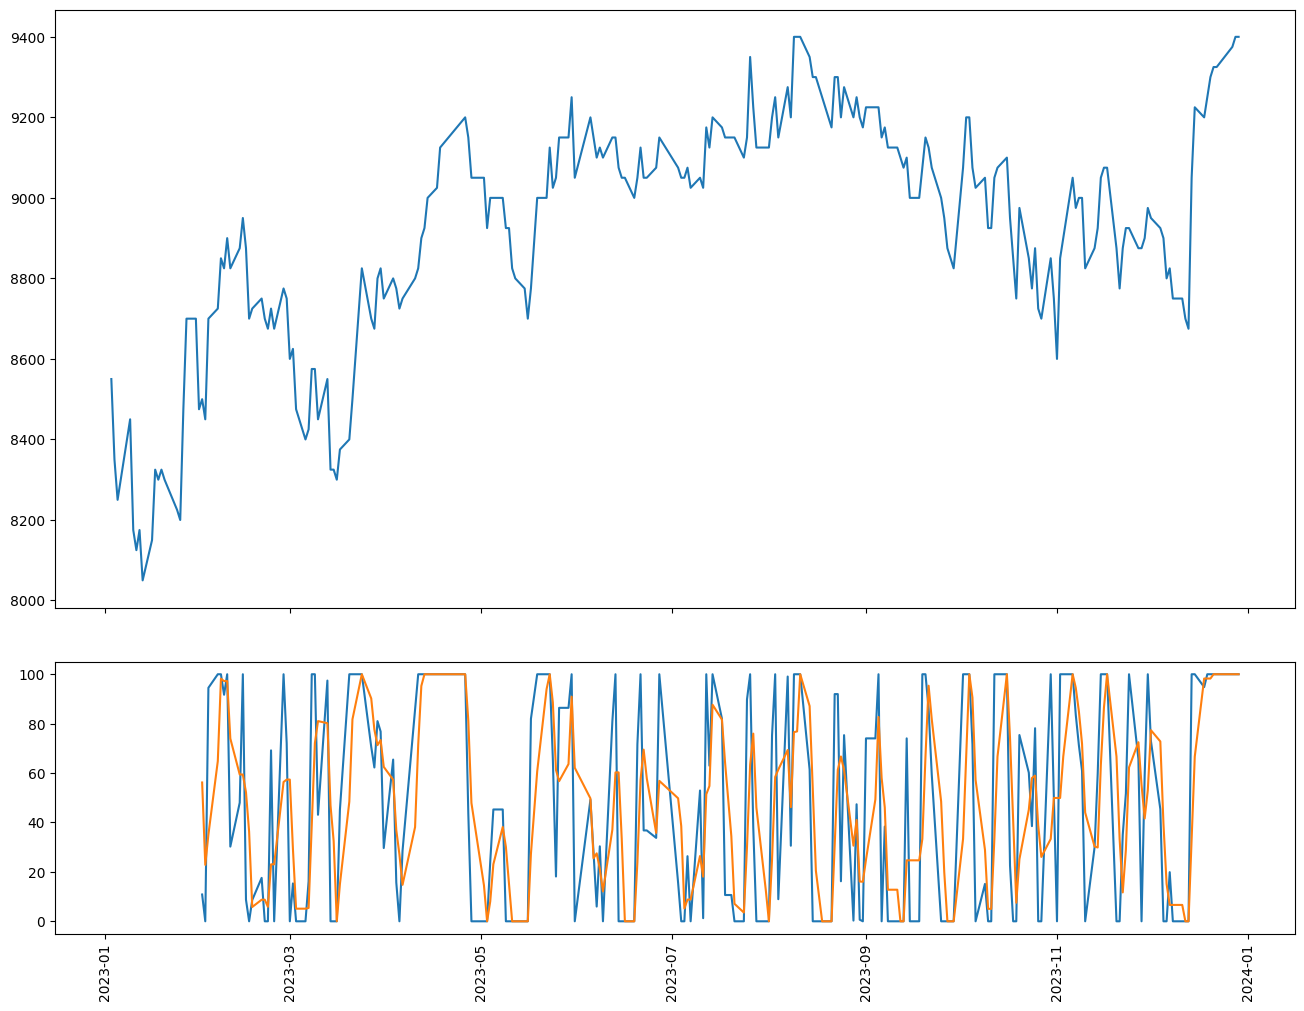

In [12]:
# calculate stoch
fastk, fastd = talib.STOCHRSI(df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot stochrsi
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], fastk, label='fastk')
ax1.plot(df['Date'], fastd, label='fastd')

plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

## MACD

Moving Average Convergence Divergence (MACD) is a momentum indicator that follows trends by showing the relationship between two moving averages of a security's price. It is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA, resulting in the MACD line. A nine-day EMA of the MACD, known as the 'signal line,' is plotted over the MACD line and can trigger buy and sell signals. Traders may buy when the MACD crosses above the signal line and sell or short when it crosses below. MACD indicators can be interpreted through crossovers, divergences, and rapid price changes.


### Key Takeaway

- The MACD is determined by subtracting the 26-period EMA from the 12-period EMA.

- It generates technical signals when it crosses above (indicating a buy) or below (indicating a sell) its signal line.

- The rate of crossovers is also used to signal whether the market is overbought or oversold.

- The MACD aids investors in gauging whether bullish or bearish price movements are gaining or losing strength.

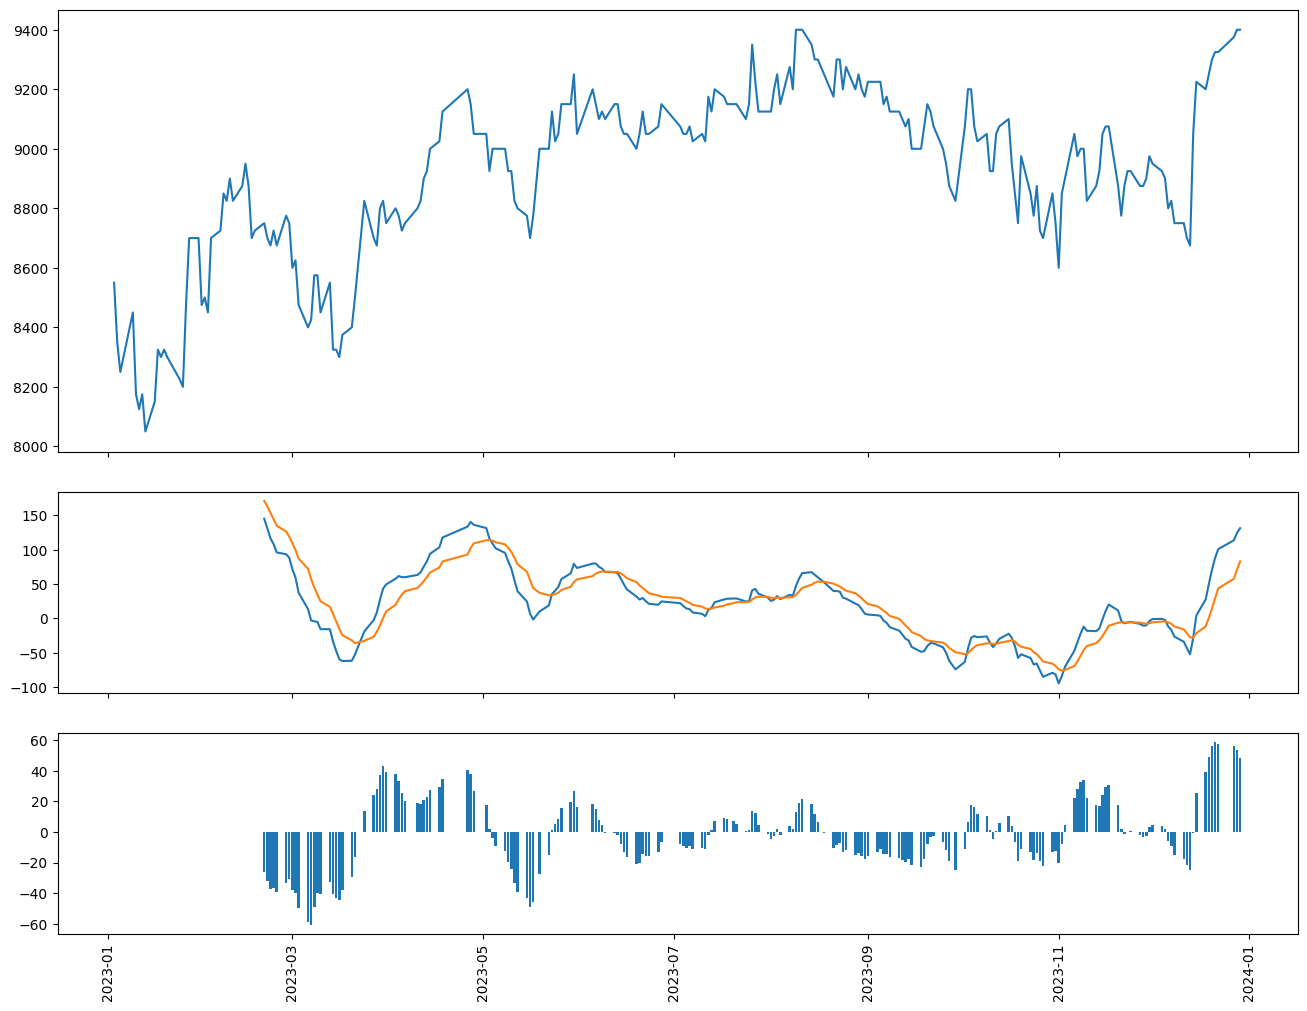

In [13]:
# calculate stoch
macd, macdsignal, macdhist = talib.MACD(df['Close'])

# plot close
ax0 = plt.subplot2grid((4,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot macd, macdsignal
ax1 = plt.subplot2grid((4,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], macd, label='macd')
ax1.plot(df['Date'], macdsignal, label='macdsignal')

# plot histogram
ax2 = plt.subplot2grid((4,1), (3,0), sharex=ax0)
ax2.bar(df['Date'], macdhist, label='macdhist')

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

## ADX

ADX measures the strength of a trend. It is calculated using a moving average of price range expansion over a specific period, typically set to 14 bars, though other periods can be used. ADX can be applied to various trading instruments like stocks, mutual funds, ETFs, and futures.

ADX is displayed as a single line with values from zero to 100. It is non-directional, indicating trend strength regardless of whether prices are rising or falling. The ADX line is usually shown alongside the two directional movement indicator (DMI) lines from which it is derived.

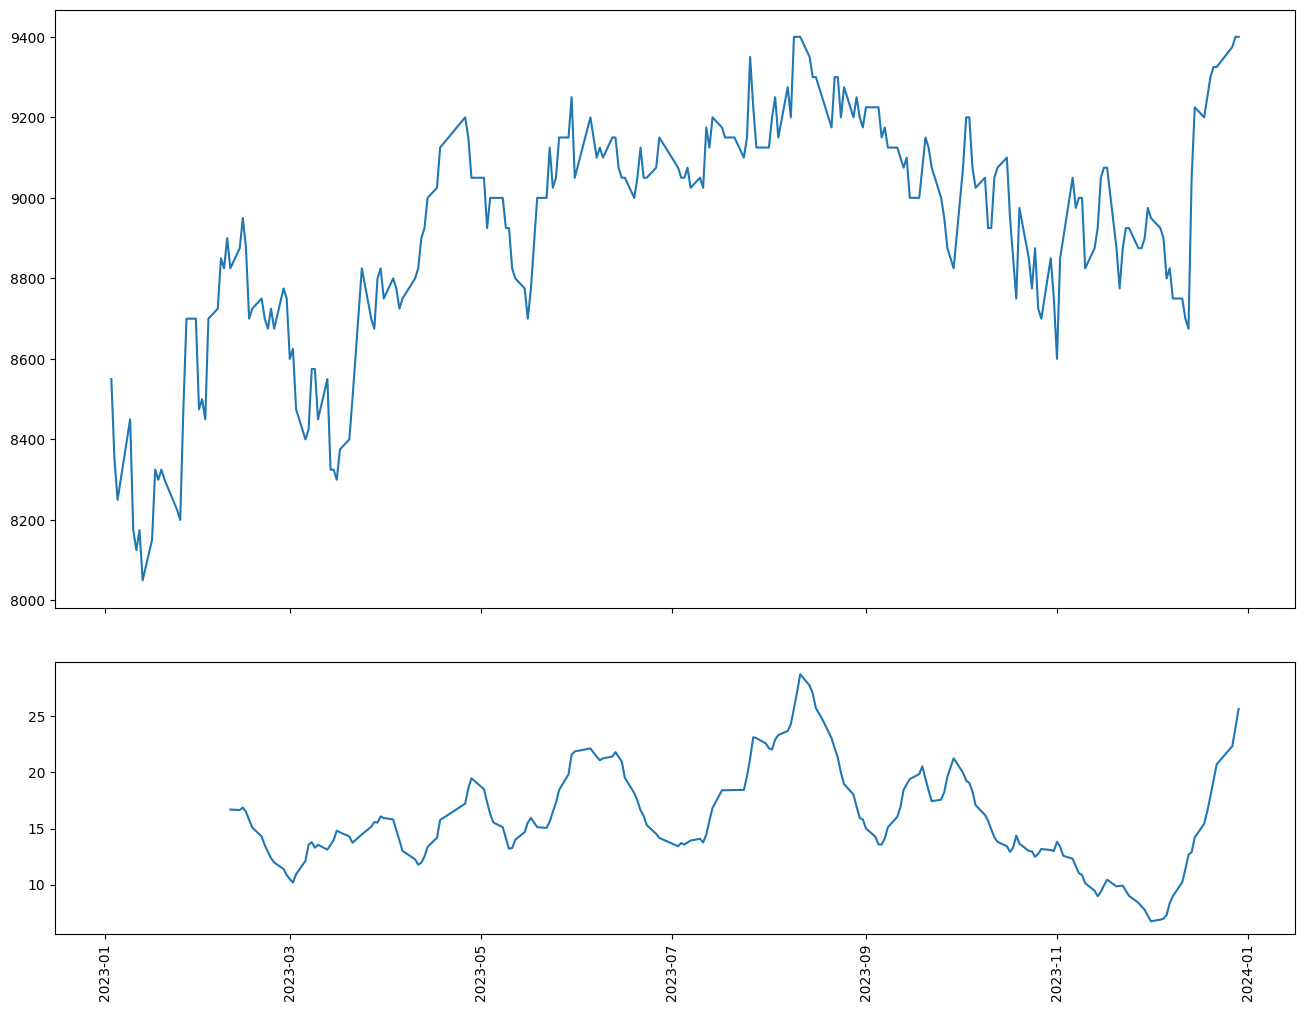

In [14]:
real = talib.ADX(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot adx
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

## Williams %R

Williams %R, or Williams Percent Range, is a momentum indicator ranging from 0 to -100 that identifies overbought and oversold conditions. It helps traders determine market entry and exit points. Similar to the Stochastic oscillator, it was created by Larry Williams and compares a stock's closing price to its high-low range over a specific period, usually 14 days.


### Key Takeaway

- Williams %R ranges from zero to -100.

- Values above -20 indicate overbought conditions.

- Values below -80 indicate oversold conditions.

- Overbought or oversold readings don't guarantee a price reversal. Overbought means the price is near its recent highs, while oversold means it's near its recent lows.

- It can generate trade signals when the price and indicator move out of overbought or oversold zones.

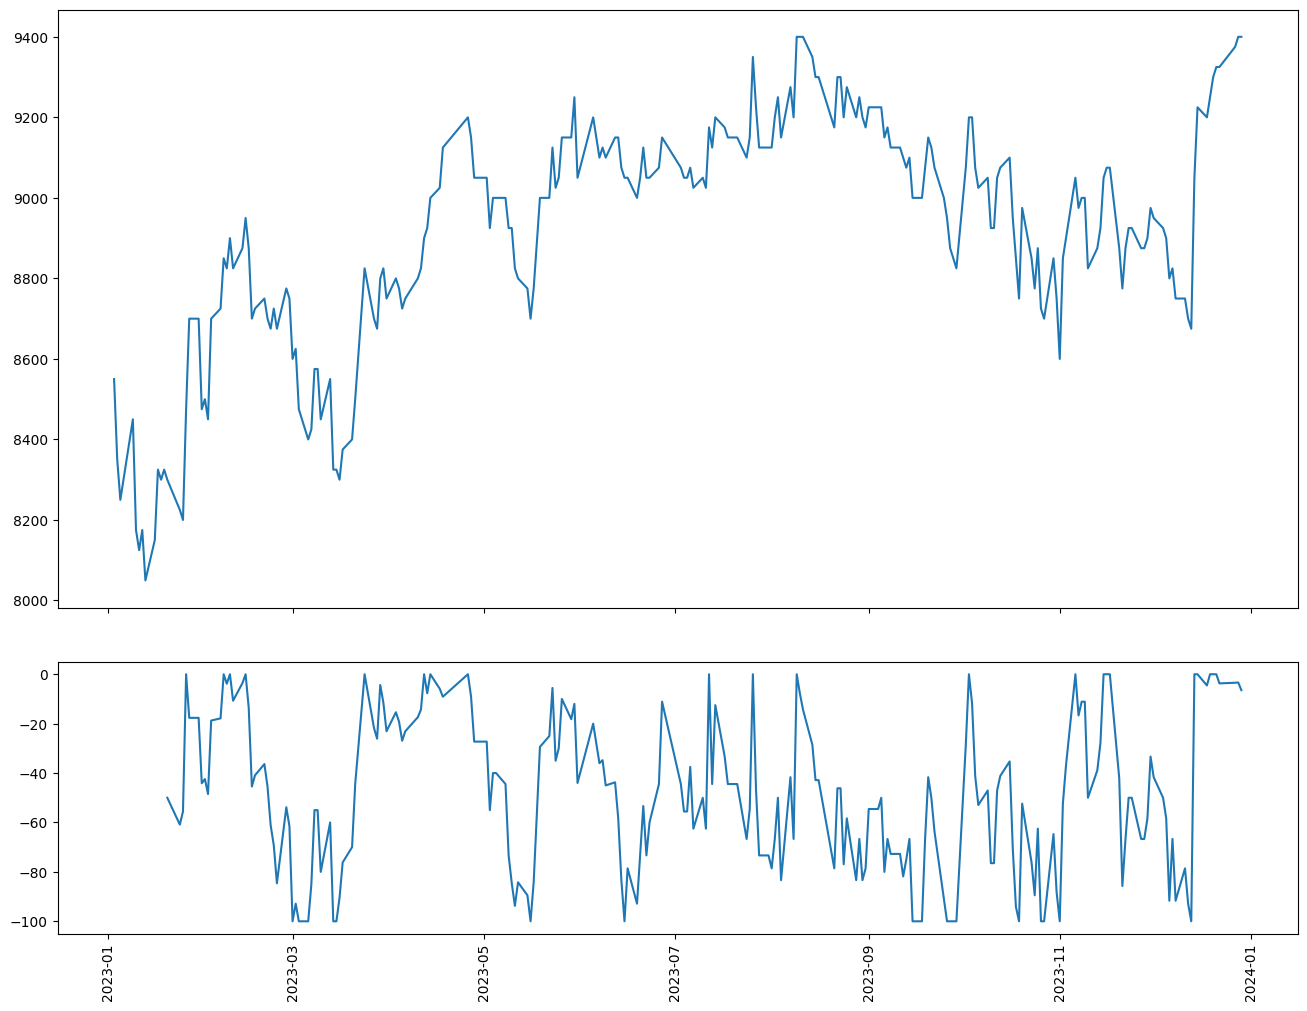

In [15]:
real = talib.WILLR(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot williams
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.xticks(rotation=90)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.show()

## CCI

Created by Donald Lambert, the Commodity Channel Index (CCI) is a momentum oscillator that helps identify when an asset is overbought or oversold. It also evaluates the direction and strength of price trends. This information aids traders in deciding whether to enter or exit trades, avoid trades, or add to existing positions. Thus, the CCI can generate trade signals based on its behavior.


### Key Takeaway

- The CCI evaluates the gap between the current price and the historical average.

- A CCI above zero signifies the price is higher than the historical average, while a CCI below zero indicates it is lower.

- Readings of 100 or more suggest the price is significantly above the historical average, indicating a strong upward trend.

- Readings below -100 suggest the price is significantly below the historical average, indicating a strong downward trend.

- Moving from negative or near-zero to +100 can signal a potential uptrend.

- Moving from positive or near-zero to -100 can signal a potential downtrend.

- As an unbounded indicator, the CCI can rise or fall indefinitely. Overbought and oversold levels are typically determined by examining historical extreme CCI levels where price reversals occurred.

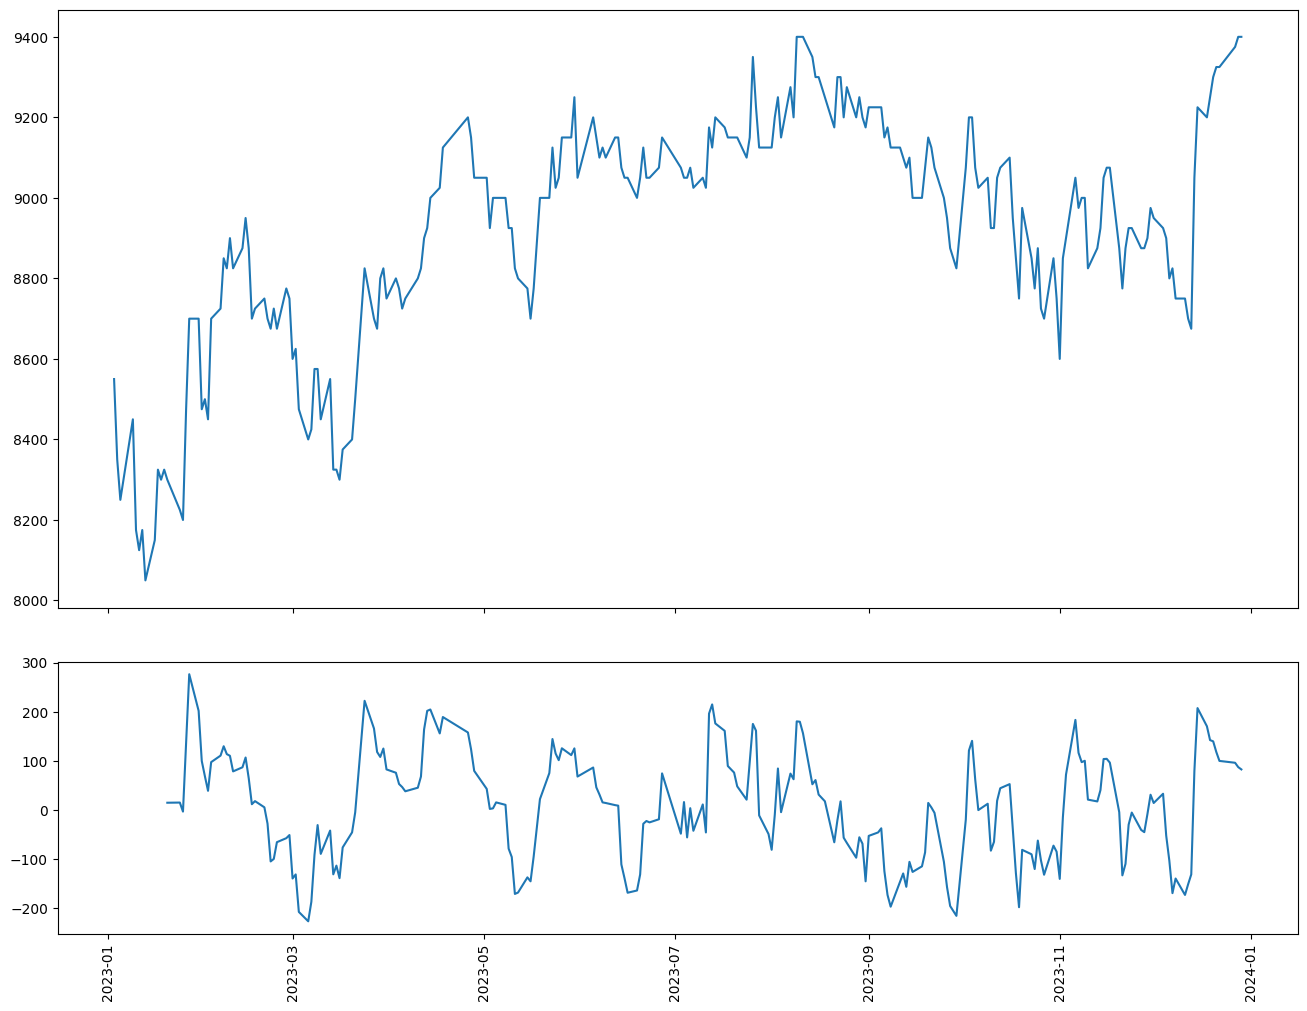

In [16]:
real = talib.CCI(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot CCI
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.xticks(rotation=90)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.show()

## ULTOSC

The Ultimate Oscillator, created by Larry Williams in 1976, is a technical indicator that measures an asset's price momentum across multiple timeframes. By averaging three different timeframes, it reduces volatility and generates fewer trade signals compared to single-timeframe oscillators. Buy and sell signals are produced based on divergences, with the Ultimate Oscillator generating fewer divergence signals due to its multi-timeframe design.


### Key Takeaway

- The indicator calculates using three timeframes: seven, 14, and 28 periods.

- The shortest timeframe carries the most weight, while the longest has the least.

- Buy signals are generated when there's a bullish divergence, with the divergence low below 30, and the oscillator rises above the divergence high.

- Sell signals are generated when there's a bearish divergence, with the divergence high above 70, and the oscillator falls below the divergence low.

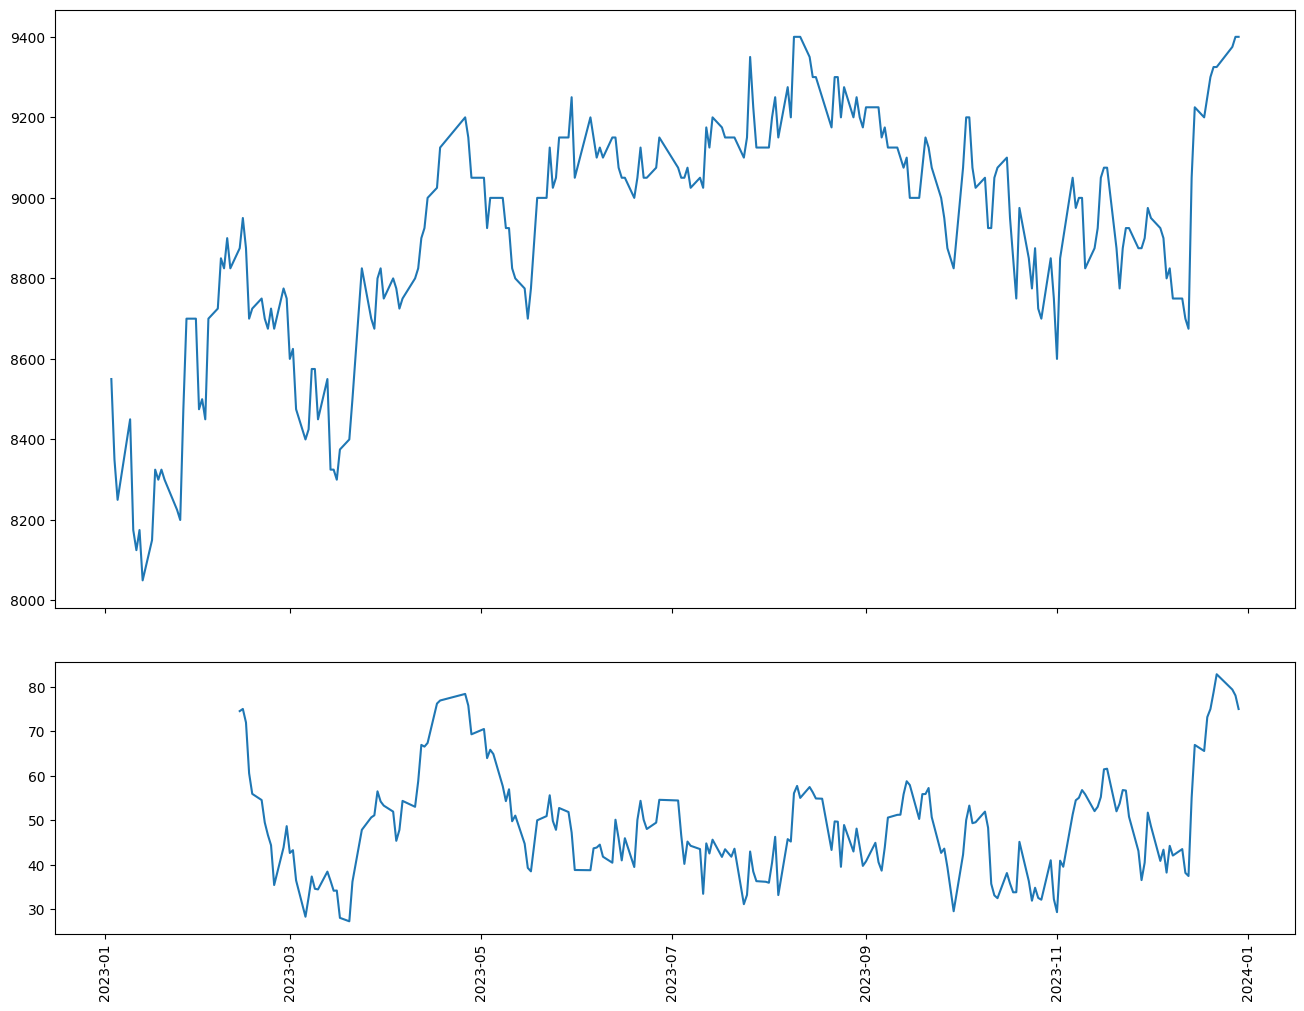

In [17]:
real = talib.ULTOSC(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot ultosc
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.xticks(rotation=90)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.show()

## ROC

The Price Rate of Change (ROC) is a momentum indicator that calculates the percentage change in price from the current price to the price a certain number of periods ago. The ROC is plotted around zero, moving into positive territory if prices rise and into negative territory if prices fall.

This indicator helps identify divergences, overbought and oversold conditions, and centerline crossovers.


### Key Takeaway

- The ROC oscillator is unbounded above zero because its value is based on price changes, which can expand indefinitely.

- A rising ROC generally indicates an uptrend, but this can be misleading as it only compares the current price to the price N days ago.

- A falling ROC suggests the current price is below the price N days ago, typically indicating a downtrend, though this isn't always accurate.

- An ROC above zero usually signals a bullish bias.

- An ROC below zero usually signals a bearish bias.

- During price consolidation, the ROC hovers near zero, providing little insight except confirming the consolidation. Traders should watch the overall price trend in this case.

- Overbought and oversold levels on the ROC are not fixed; each asset generates its own extreme levels based on historical readings where price reversals occurred.

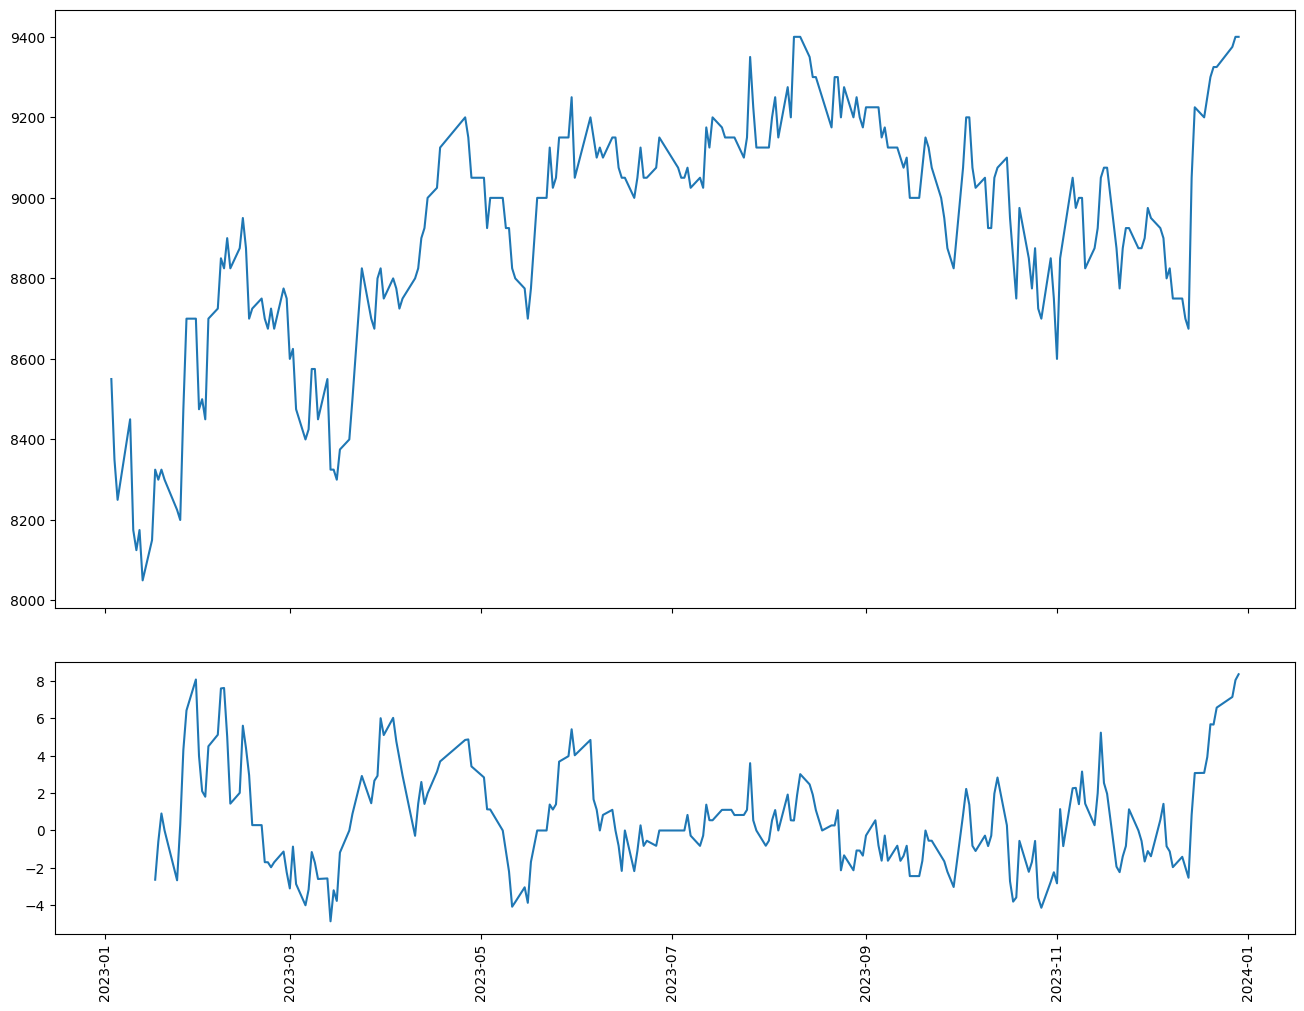

In [18]:
real = talib.ROC(df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot roc
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.xticks(rotation=90)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.show()

# Fundamental Analysis of stocks

## Definition
Fundamental analysis of stocks is a method used to determine the intrinsic value of a stock. This is done by analyzing various economic, financial, and other qualitative and quantitative factors that can affect the stock's value. The main goal of fundamental analysis is to determine whether a stock is overvalued or undervalued based on the company's financial condition and future prospects.

In [19]:
ticker = 'BBCA.JK'
ticker_object = yf.Ticker(ticker)
balance_sheet = ticker_object.balancesheet
income_statement = ticker_object.financials # Use .financials to get income statement
cf = ticker_object.cashflow # Use .cashflow for cash flow data
years = balance_sheet.columns

## Some Indicators

### ROA (Return on Assets)
Measures how efficiently a company uses its assets to generate profit. ROA is calculated by dividing net income by total assets. A higher ROA indicates better asset management.

### ROE (Return on Equity)
Assesses how effectively a company uses shareholders' equity to generate profit. ROE is calculated by dividing net income by total equity. A higher ROE signifies better returns on shareholders' investments.

### DA (Debt to Assets)
This ratio measures the proportion of a company's assets that are financed by debt. It is calculated by dividing total debt by total assets. A higher ratio indicates that a larger portion of the company's assets are financed through debt, which can imply higher financial risk.

### DE (Debt to Equity)
This ratio compares a company's total debt to its total equity, showing the relative proportion of debt and equity used to finance the company's assets. It is calculated by dividing total debt by total equity. A higher ratio suggests that the company is using more debt relative to equity, which can also indicate higher financial leverage and risk.

In [21]:
#RoA
net_income_key = 'netIncome' if 'netIncome' in income_statement[years[0]] else 'Net Income'
totalAssets_key = 'Total Assets' if 'Total Assets' in balance_sheet[years[0]] else 'totalAssets'
net_income = income_statement[years[0]][net_income_key]
totalAssets = balance_sheet[years[0]][totalAssets_key]
RoA  = net_income /totalAssets

#RoE
net_income  = income_statement[years[0]][net_income_key]

# Check for different variations of the key
equity_key = None
for key in ['Total Stockholder Equity', 'totalStockholderEquity', 'Stockholders Equity']:
    if key in balance_sheet[years[0]]:
      equity_key = key
      break

if equity_key is None:
   print(f"Warning: Could not find equity key in balance sheet for {ticker}")
   RoE = None  # Or handle the missing key in a different way
else:
   equity  = balance_sheet[years[0]][equity_key]
   RoE  = net_income / equity

#Debt to Assets
# Check if 'longTermDebt' key exists before accessing it
totalDebt = 0  # Initialize to 0 in case the keys are not found
debt = 0  # Initialize to 0 in case the keys are not found
totalAssets = 0  # Initialize to 0 in case the keys are not found
totalDebt += balance_sheet[years[0]]['Total Debt']
totalAssets += balance_sheet[years[0]]['Total Assets']
debt = totalDebt / totalAssets

#debt to equity
# Check if keys exist before accessing them
if 'totalStockholderEquity' in balance_sheet[years[0]]:
    equity = balance_sheet[years[0]]['totalStockholderEquity']
debt_to_Equity = totalDebt / equity


In [24]:
profit = {'ticker': ticker,
          'Return on Asset':RoA,
          'Return on Equity':RoE,
          'Debt to Assets': debt,
          'Debt to Equity':debt_to_Equity}
profit

{'ticker': 'BBCA.JK',
 'Return on Asset': 0.03454220570920956,
 'Return on Equity': 0.20069266130270638,
 'Debt to Assets': 0.001684451524745978,
 'Debt to Equity': 0.009786782644471947}